In [1]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
from matplotlib.axes import Axes
from matplotlib.figure import Figure

import utilities_plot as up
from utilities_model import VAE

In [2]:
with open("tmp/data.pkl", "rb") as f:
    data = pickle.load(f)
with open("tmp/data_id_dict.pkl", "rb") as f:
    data_id_dict = pickle.load(f)
with open("tmp/child_id_dict.pkl", "rb") as f:
    child_id_dict = pickle.load(f)
with open("tmp/word_dict.pkl", "rb") as f:
    word_dict = pickle.load(f)
with open("tmp/category_dict.pkl", "rb") as f:
    category_dict = pickle.load(f)


model = VAE().to("cuda")
model.eval()
model.load_state_dict(torch.load("tmp/best_model.pth"))
# model.load_state_dict(torch.load("tmp/model_state_dict.pth"))

word_count = len(word_dict)
figs = {}

242
[(2591, 18, 47.0), (2592, 24, 291.0), (2593, 30, 634.0)]


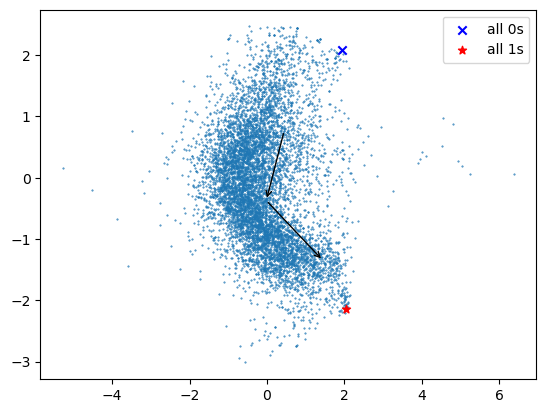

In [3]:
import random

figs["arrow"] = plt.subplots()
fig, ax = figs["arrow"]
up.plot_x(model, data, ax)
data_ids = []
for i, v in child_id_dict.items():
    if len(v) >= 3:
        data_ids.append([j[0] for j in v])
print(len(data_ids))
n = 1
datas = random.sample(data_ids, n)
child_id = data_id_dict[datas[0][0]][0]
print(child_id_dict[child_id])
for i in datas:
    up.plot_arrow(model, i, ax)

[3499, 3547, 3652, 3942]


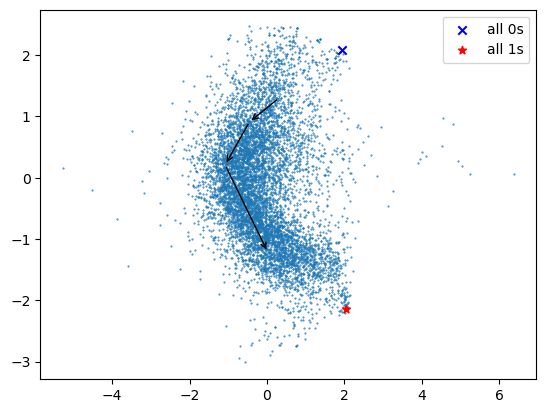

In [4]:
# child_id: 3461, 3499, 2860
tmp_data_id = 3499
tmp_child_id = data_id_dict[tmp_data_id][0]
# print(tmp_child_id)
# print(child_id_dict[tmp_child_id])
data_ids = [i[0] for i in child_id_dict[tmp_child_id]]
print(data_ids)
figs["tmp"] = plt.subplots()
fig, ax = figs["tmp"]
up.plot_x(model, data, ax)
up.plot_arrow(model, data_ids, ax)


In [9]:
tmp_data = up.child_id_to_data(2920)
tmp_z = up.x_to_z(model, tmp_data)
point_O = tmp_z[1, :]
point_A = tmp_z[2, :]
point_P = tmp_z[3, :]


array([-1.078585 ,  0.2089502], dtype=float32)